In [76]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("setup complete")

setup complete


In [87]:
df = pd.read_csv('datasets/fantasy_2019.csv')
df.rename({
    'TD': "PassingTD",
    'TD.1': 'RushingTD',
    'TD.2': 'ReceivingTD',
    'TD.3': 'TotalTD',
    'Yds': 'PassingYDs',
    'Yds.1': 'RushingYDs',
    'Yds.2': 'ReceivingYDs',
    'Att': 'PassingAtt',
    'Att.1': 'RushingAtt'
    
    
}, axis=1, inplace=True)
df['Player'] = df['Player'].apply(lambda x: x.split('*')[0]).apply(lambda x: x.split('\\')[0])
# df.drop(['Unnamed: 0'], axis=1, inplace=True)
convert = {
    'Age': 'int64',
    'G': 'int64',
    'GS': 'int64',
    'Cmp': 'int64',
    'PassingAtt': 'int64',
    'PassingTD': 'int64',
    'Int': 'int64',
    'RushingAtt': 'int64',
    'Y/A': 'int64',
    'RushingTD': 'int64',
    'Tgt': 'int64',
    'Rec': 'int64',
    'ReceivingTD': 'int64',
    'Fmb': 'int64',
    'FL': 'int64',
    'TotalTD': 'int64',
    'PosRank': 'int64',
    'OvRank': 'int64'
}
df = df.astype(convert)
#df.dtypes

In [88]:
df_rb = df[df['FantPos'] == 'RB']
df_qb = df[df['FantPos'] == 'QB']
df_wr = df[df['FantPos'] == 'WR']
df_te = df[df['FantPos'] == 'TE']

In [89]:
rushing_col = ['RushingAtt', 'RushingYDs', 'Y/A', 'RushingTD']
receiving_col = ['Tgt', 'Rec', 'ReceivingYDs', 'Y/R', 'ReceivingTD']
passing_col = ['PassingAtt', 'PassingYDs', 'PassingTD', 'Int']

def transform_columns(df, new_column_list):
    df = df[['Player', 'Tm', 'Age', 'G'] + new_column_list + ['FL', 'PPR']]
    return df

In [90]:
df_rb = transform_columns(df_rb, rushing_col + receiving_col)
df_qb = transform_columns(df_qb, passing_col + rushing_col)
df_wr = transform_columns(df_wr, receiving_col)
df_te = transform_columns(df_te, receiving_col)
dfs = [df_rb, df_qb, df_wr, df_te]
df_te.head()

,Player,Tm,Age,G,Tgt,Rec,ReceivingYDs,Y/R,ReceivingTD,FL,PPR
7,Travis Kelce,KAN,30,16,136,97,1229.0,12.67,5,1,254.3
12,Mark Andrews,BAL,23,15,98,64,852.0,13.31,10,1,207.2
15,George Kittle,SFO,26,14,107,85,1053.0,12.39,5,0,222.5
18,Darren Waller,OAK,27,16,117,90,1145.0,12.72,3,1,221.0
21,Zach Ertz,PHI,29,15,135,88,916.0,10.41,6,1,215.6


In [91]:
for x in dfs:
    x['FantasyPoints/GM'] = x['PPR']/x['G']

df_wr['Usage/GM'] = df_wr['Tgt']/df_wr['G']
df_rb['Usage/GM'] = (df_rb['Tgt'] + df_rb['RushingAtt'])/df_rb['G']
df_te['Usage/GM'] = df_te['Tgt']/df_te['G']

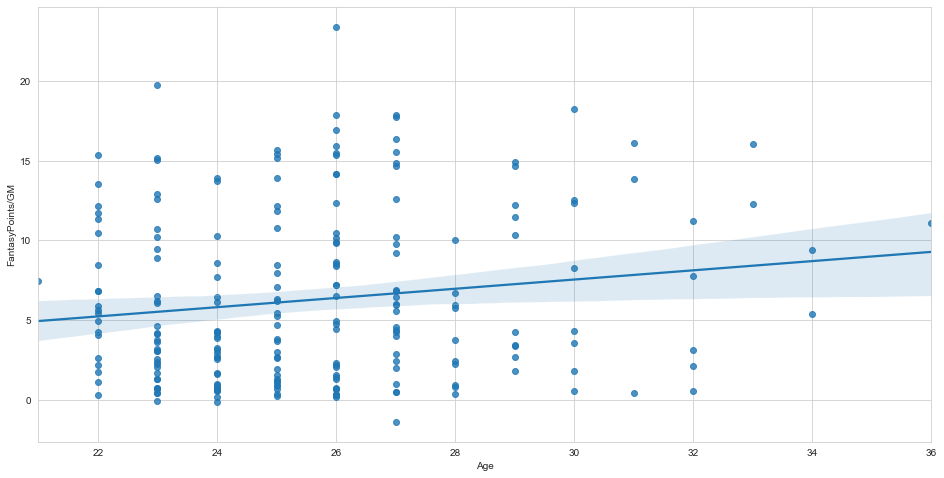

In [95]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

plot = sns.regplot(
    x=df_wr['Age'],
    y=df_wr['FantasyPoints/GM'],
    scatter=True,
)